# Model training

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report
from sklearn.metrics import confusion_matrix, classification_report


In [29]:
df = pd.read_csv("../data/prediction.csv", index_col=0, parse_dates=True)

In [30]:
df.head()

,bb_pband_100,bb_wband_100,bb_pband_1000,bb_wband_1000,bb_pband_10000,bb_wband_10000,bb_pband_100000,bb_wband_100000,random,target
2021-04-23 07:31:43.163,-0.028283,1.171596,-0.141699,1.693215,0.055286,5.770457,-0.099426,19.767828,0.206795,0
2021-04-23 08:09:50.155,0.100004,0.511501,-0.013794,1.247674,-0.040643,6.452958,-0.158316,19.783657,0.892490,1
2021-04-23 08:31:29.099,0.868308,0.773623,0.989084,1.676026,0.239313,6.039456,-0.078847,19.828140,0.162989,0
2021-04-23 09:40:37.273,0.014651,1.201216,-0.283597,1.543404,0.071365,5.822683,-0.121242,19.894477,0.664275,1
2021-04-23 10:06:50.048,0.981292,0.821842,0.981854,1.787875,0.428752,5.904694,-0.027341,19.900041,0.468784,1


In [5]:
X = df.drop(["target"], axis=1)
X.head(3)

,bb_pband_100,bb_wband_100,bb_pband_1000,bb_wband_1000,bb_pband_10000,bb_wband_10000,bb_pband_100000,bb_wband_100000,random
2021-04-23 07:31:43.163,-0.028283,1.171596,-0.141699,1.693215,0.055286,5.770457,-0.099426,19.767828,0.206795
2021-04-23 08:09:50.155,0.100004,0.511501,-0.013794,1.247674,-0.040643,6.452958,-0.158316,19.783657,0.892490
2021-04-23 08:31:29.099,0.868308,0.773623,0.989084,1.676026,0.239313,6.039456,-0.078847,19.828140,0.162989


In [6]:
y = df.target
y

2021-04-23 07:31:43.163    0
2021-04-23 08:09:50.155    1
2021-04-23 08:31:29.099    0
2021-04-23 09:40:37.273    1
2021-04-23 10:06:50.048    1
                          ..
2021-06-19 04:32:03.276    1
2021-06-19 06:30:57.226    1
2021-06-19 12:07:09.748    0
2021-06-19 12:48:14.298    1
2021-06-19 14:36:28.808    0
Name: target, Length: 610, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    shuffle=False)

In [20]:
n_estimators = 10000
model = RandomForestClassifier(max_depth=2, n_estimators=n_estimators,
                            criterion='entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=10000)

Text(-1.5, 0.5, 'Predicted label')

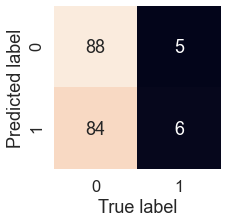

In [21]:
y_preds = model.predict(X_test)	

sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=False,
                 fmt='d')
plt.xlabel("True label")
plt.ylabel("Predicted label")

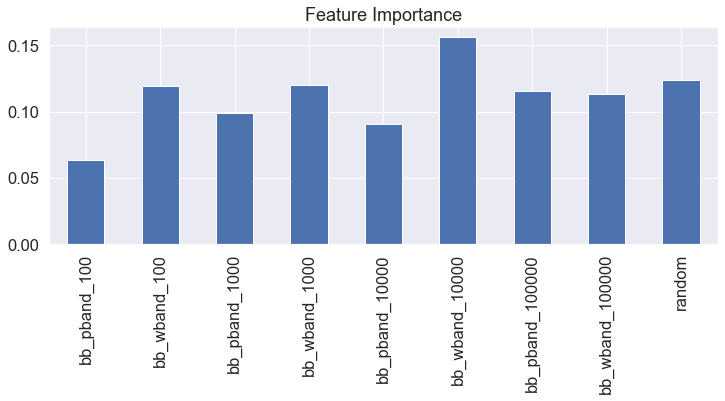

In [22]:
feature_dict = dict(zip(X_train.columns, list(model.feature_importances_)))
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(12, 4));

In [23]:
y_pred_rf = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.95      0.66        93
           1       0.55      0.07      0.12        90

    accuracy                           0.51       183
   macro avg       0.53      0.51      0.39       183
weighted avg       0.53      0.51      0.40       183



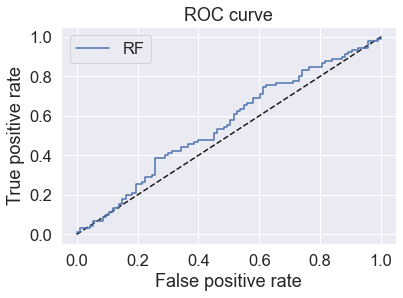

In [24]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

## Plotting

In [31]:
prices = pd.read_csv("../data/BTCUSDT-volume-bars.csv", index_col=0, parse_dates=True)

In [34]:
df.target

2021-04-23 07:31:43.163    0
2021-04-23 08:09:50.155    1
2021-04-23 08:31:29.099    0
2021-04-23 09:40:37.273    1
2021-04-23 10:06:50.048    1
                          ..
2021-06-19 04:32:03.276    1
2021-06-19 06:30:57.226    1
2021-06-19 12:07:09.748    0
2021-06-19 12:48:14.298    1
2021-06-19 14:36:28.808    0
Name: target, Length: 610, dtype: int64

In [45]:
plot = df[-len(y_pred):].copy()
plot["close"] = prices.reindex(plot.index).close
plot["up"] = list(map(lambda x, c: c if x==1 else None, y_pred, plot.close))
plot["down"] = list(map(lambda x, c: c if x==0 else None, y_pred, plot.close))


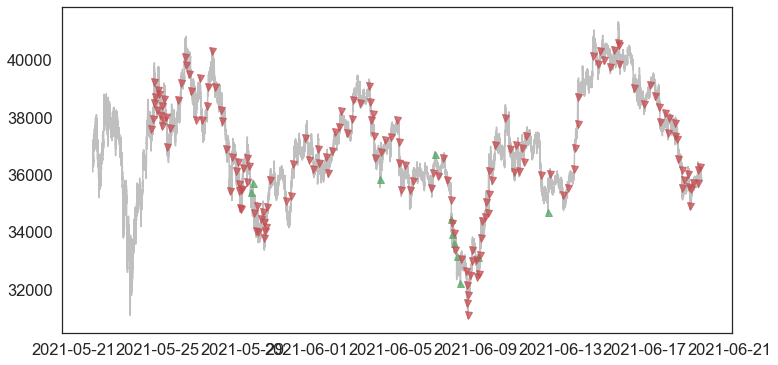

In [57]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(prices.close[-500000:], alpha=.5, color="gray")

ax.plot(plot.up, marker='^', markersize=7,
                     alpha=0.75, label='upcross', color='g', linewidth=0)

ax.plot(plot.down, marker='v', markersize=7,
                     alpha=0.75, label='upcross', color='r', linewidth=0)